### Recommend the proper clothing category.

1. Create a TensorFlow model that performs product classification based on the available categories.
2. Base models/ save the models in .h5 format.
3. Perform Transfer Learning on the existing _91Model.h5_ .
4. Plot graphs for all the models that.


# 1. Train models

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import keras
import os
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [4]:
model_history = {}

## Load data _image_dataset_from_directory_

In this notebook I have used two different methods for loading data.

- For better performance and speed I used _image_dataset_from_directory_ when training models from the original __Products__ dataset.

- For convenience (simplicity of using data augmentation) I used _ImageDataGenerator_  when doing transfer learning on the third part of the task.

There are more efficient image classification input pipelines out there like: tf.data.Dataset with image files or tf.data.Dataset with TFRecords (which plays well also when using TPUs), which are bit more complex.

In [5]:
data_dir = "Products/"
num_classes = 29
batch_size = 128
img_size = (150, 150)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=13,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=13,
    image_size=img_size,  
    batch_size=batch_size
)

Found 9398 files belonging to 29 classes.
Using 7519 files for training.
Found 9398 files belonging to 29 classes.
Using 1879 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['beanie', 'bikini', 'blazers', 'boat-shoes', 'boatneck-tops', 'bodysuit', 'boots', 'bowtie', 'bracelets', 'business-suits', 'cami-tops', 'chelsea-boots', 'coats', 'crop-tops', 'demin-jackets', 'earrings', 'evening-gowns', 'gloves', 'hoodies', 'pumps', 'scarf', 'skirts', 'sneakers', 'stilettos', 'sunglasses', 'trousers', 'tuxedos', 'waistcoat', 'wristwatch']


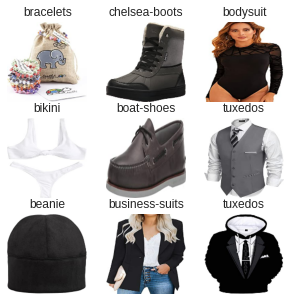

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [8]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(128, 150, 150, 3)
(128,)


## small_cnn model

In [30]:
small_cnn = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes, activation="softmax")
])


In [31]:
small_cnn.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [32]:
model_history['small_cnn'] = small_cnn.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)

Epoch 1/15
59/59 [==============================] - 19s 291ms/step - loss: 20.4571 - accuracy: 0.1676 - val_loss: 1.4837 - val_accuracy: 0.6338
Epoch 2/15
59/59 [==============================] - 18s 284ms/step - loss: 0.9012 - accuracy: 0.7724 - val_loss: 1.2670 - val_accuracy: 0.6844
Epoch 3/15
59/59 [==============================] - 18s 284ms/step - loss: 0.3786 - accuracy: 0.9127 - val_loss: 1.3479 - val_accuracy: 0.6732
Epoch 4/15
59/59 [==============================] - 18s 285ms/step - loss: 0.2214 - accuracy: 0.9533 - val_loss: 1.3351 - val_accuracy: 0.7030
Epoch 5/15
59/59 [==============================] - 18s 285ms/step - loss: 0.2075 - accuracy: 0.9674 - val_loss: 1.4000 - val_accuracy: 0.7078
Epoch 6/15
59/59 [==============================] - 18s 285ms/step - loss: 0.1447 - accuracy: 0.9735 - val_loss: 1.3996 - val_accuracy: 0.6945
Epoch 7/15
59/59 [==============================] - 18s 284ms/step - loss: 0.1785 - accuracy: 0.9740 - val_loss: 1.4150 - val_accuracy: 0.691

## medium_cnn model

In [33]:
medium_cnn = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation="softmax")
])


medium_cnn.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [35]:
model_history['medium_cnn'] = medium_cnn.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15
)

Epoch 1/15
59/59 [==============================] - 36s 596ms/step - loss: 2.7637 - accuracy: 0.3575 - val_loss: 1.5386 - val_accuracy: 0.5785
Epoch 2/15
59/59 [==============================] - 31s 500ms/step - loss: 1.0202 - accuracy: 0.7142 - val_loss: 1.3009 - val_accuracy: 0.6583
Epoch 3/15
59/59 [==============================] - 31s 500ms/step - loss: 0.5055 - accuracy: 0.8548 - val_loss: 1.2969 - val_accuracy: 0.6887
Epoch 4/15
59/59 [==============================] - 31s 504ms/step - loss: 0.2974 - accuracy: 0.9233 - val_loss: 1.3265 - val_accuracy: 0.7062
Epoch 5/15
59/59 [==============================] - 31s 501ms/step - loss: 0.2093 - accuracy: 0.9487 - val_loss: 1.4289 - val_accuracy: 0.7115
Epoch 6/15
59/59 [==============================] - 31s 502ms/step - loss: 0.1613 - accuracy: 0.9632 - val_loss: 1.3776 - val_accuracy: 0.7121
Epoch 7/15
59/59 [==============================] - 31s 501ms/step - loss: 0.1292 - accuracy: 0.9682 - val_loss: 1.2915 - val_accuracy: 0.7296

## regularized_model  (_droput, batchnormalization, regularizer_)

As we can see the models above suffer from overfitting. Some standard techniques to deal with overfitting are:

- Weight regularization L1, L2
- BatchNormalization
- Dropout

We applied these three techniques on the model3 below: within first 20 epochs they seem to help but again slowly the models starts overfitting.

This comes down to two simple facts:
 - the dataset is too small to build a model from scratch
 - the number of classes (29) does not help either as there is even less data for the model to learn a good class representation.

In [36]:
regularized_model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    # Data augmentation
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes, activation="softmax")
])


regularized_model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [37]:
regularized_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15
)

Epoch 1/15
59/59 [==============================] - 31s 501ms/step - loss: 8.5611 - accuracy: 0.1314 - val_loss: 5.2658 - val_accuracy: 0.0718
Epoch 2/15
59/59 [==============================] - 30s 498ms/step - loss: 4.2516 - accuracy: 0.3134 - val_loss: 4.6449 - val_accuracy: 0.1064
Epoch 3/15
59/59 [==============================] - 30s 497ms/step - loss: 3.3910 - accuracy: 0.4094 - val_loss: 4.2305 - val_accuracy: 0.1953
Epoch 4/15
59/59 [==============================] - 30s 499ms/step - loss: 2.9853 - accuracy: 0.4545 - val_loss: 3.9569 - val_accuracy: 0.2916
Epoch 5/15
59/59 [==============================] - 30s 498ms/step - loss: 2.6563 - accuracy: 0.5148 - val_loss: 3.6691 - val_accuracy: 0.3363
Epoch 6/15
59/59 [==============================] - 30s 499ms/step - loss: 2.4283 - accuracy: 0.5550 - val_loss: 3.1366 - val_accuracy: 0.5029
Epoch 7/15
59/59 [==============================] - 30s 499ms/step - loss: 2.4089 - accuracy: 0.5559 - val_loss: 2.9870 - val_accuracy: 0.4577

# 2. Save models

In [39]:
small_cnn.save("small_cnn.h5")
medium_cnn.save("medium_cnn.h5")
regularized_model.save("regularized_model.h5")

In [ ]:
small_model =  keras.models.load_model("small_model.h5")
medium_cnn =  keras.models.load_model("medium_cnn.h5")
regularized_model =  keras.models.load_model("regularized_model.h5")

In [ ]:
regularized_model.summary()

# 3. Transfer Learning

The model that was provided for the task (__91Model.h5__) requires working with grayscale images (1 color channel) which we can do using the parameter `color_mode='grayscale'`. But the dataset contains some images that are detected as GIF format even though they have .jpg extension, which makes ImageDataGenerator throw an exception as GIF images cannot be used in `grayscale` mode.

I commented out the code below (which is used to convert those images to JPEG), in case that only my data was corrupted.

In [43]:
# from PIL import Image
# import os
# import imghdr

# gif_detected = []
# for subdir, dirs, files in os.walk(data_dir):
#     for file in files:
#         path = os.path.join(subdir, file)
#         if imghdr.what(path) == "gif":
#             Image.open(path).convert('RGB').save(str(path))
#             gif_detected.append(path)
            
# gif_detected

['Products/evening-gowns/evening-gowns-47.jpg',
 'Products/evening-gowns/evening-gowns-107.jpg',
 'Products/evening-gowns/evening-gowns-84.jpg',
 'Products/evening-gowns/evening-gowns-97.jpg',
 'Products/evening-gowns/evening-gowns-57.jpg']

## Load data _ImageDataGenerator_

In [44]:
def load_data_and_train(path, img_size=(28,28), color_mode='grayscale', epochs=25):
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255, #rescale to 0..1
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        validation_split=0.2 
    )

    train_ds = datagen.flow_from_directory(
        path,
        target_size=img_size,
        batch_size=32,
        subset='training',
        color_mode=color_mode,
        class_mode='sparse'
    )

    validation_ds = datagen.flow_from_directory(
        path,
        target_size=img_size,
        batch_size=32,
        subset='validation',
        color_mode=color_mode,
        class_mode='sparse'
    )

    num_classes = len(os.listdir(path)) - 1
    model = build_model(num_classes)
    history = model.fit(train_ds, validation_data=validation_ds, epochs=epochs)
    
    return history

## Transfer Learning FashionMnist

In [49]:
def build_model(num_classes, img_size=28):
    inputs = tf.keras.Input(shape=(img_size, img_size, 1))

    base_model = keras.models.load_model('91Model.h5')
    
    # Drop classification head (last 3 layers)
    for i in range(3):
        base_model.pop()
        
    # Rebuild top
    x = base_model(inputs, training=False)
    x = tf.keras.layers.Conv2D(256, 3, activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.BatchNormalization()(x)
    
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    
    outputs = tf.keras.layers.Dense(num_classes, activation="softmax", name="pred")(x)
    # Compile
    model = tf.keras.Model(inputs, outputs)
    model.summary()

    model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model


In [50]:
model_history['tl_fashionmnist'] = load_data_and_train("Products/", img_size=(28, 28), epochs=15)

Found 7530 images belonging to 29 classes.
Found 1868 images belonging to 29 classes.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
sequential_7 (Sequential)    (None, 5, 5, 128)         74496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 3, 3, 256)         295168    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 1, 256)         0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 1, 1, 256)         1024      
_________________________________________________________________
flatten_11 (Flatten)         (None, 256)               0         
_______________________________________

## Transfer Learning using Xception model pretrained on ImageNet

In [52]:
def build_model(num_classes, img_size=150):
    inputs = tf.keras.Input(shape=(img_size, img_size, 3))

    base_model = keras.applications.Xception(
        weights='imagenet',
        include_top=False
    )

    # Freeze the pretrained weights
    base_model.trainable = False

    # Rebuild top
    x = base_model(inputs, training=False)
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs)
    model.summary()

    model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

In [54]:
model_history['tl_xception'] = load_data_and_train("Products/", img_size=(150, 150), color_mode="rgb", epochs=15)

Found 7530 images belonging to 29 classes.
Found 1868 images belonging to 29 classes.
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, None, None, 2048)  20861480  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               262272    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
pred (Dense)                 (None, 29)                3741      
Total params: 21,127,493
Trainable para

# 4. Graphs

In [57]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import matplotlib.pyplot as plt

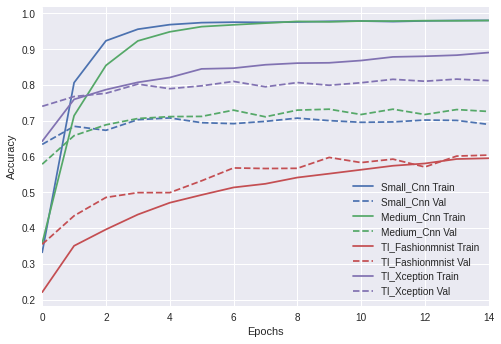

In [59]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy')
plotter.plot(model_history)

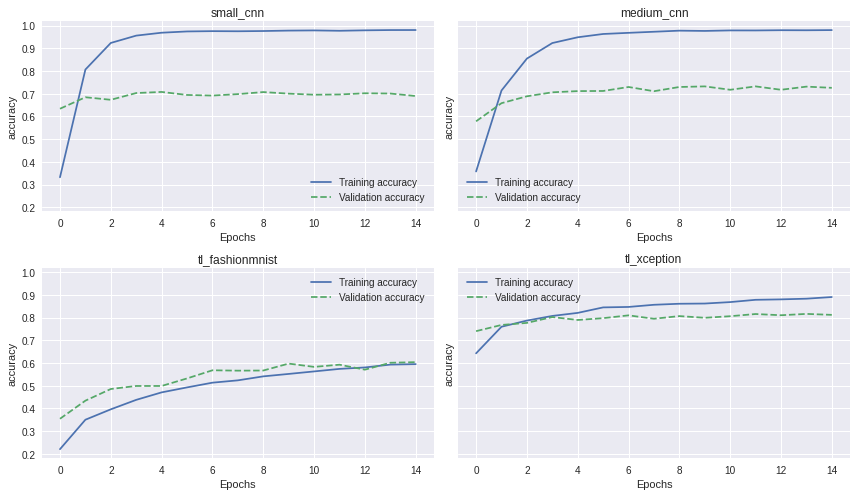

In [61]:
model_history_iter = iter(model_history)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 7), sharey=True)
for row in range(2):
    for col in range(2):
        metric = "accuracy"
        model_name = next(model_history_iter)
        train_value = model_history[model_name].history[metric]
        val_value = model_history[model_name].history['val_' + metric]
        epochs = model_history[model_name].epoch
        ax[row, col].plot(epochs, train_value, label='Training accuracy')
        ax[row, col].plot(epochs, val_value, '--', label='Validation accuracy')
        ax[row, col].set_title(model_name)
        ax[row, col].set_xlabel('Epochs')
        ax[row, col].set_ylabel(metric)
        ax[row, col].legend(frameon=False)

fig.tight_layout()
plt.show()

# 5. Conclusion

The performance of some models may be a bit better if they were trained for more epochs, i.e _tl-fashionmnist_ model, but when run for more epochs, after 20 epochs it starts overfitting. In our visualizations above/below we have chosen 15 epochs just for the sake of aesthetics.

Clearly, the model with the best performance is the one using Xception model with pretrained weights on ImageNet. We also tried another model EfficientNetB3 which is also trained on ImageNet but the performance was uncomparable with Xception.

Improvements:

- Next logical step is to try Fine-tuning the model: unfreeze all or a part of the model and retrain the whole model end-to-end with a low learning rate.
- Learning rate decay/scheduling: to control how the learning rate of the optimizer changes over time
- Debug using Tensorboard
- Collect more data